# Orientation Estimation


## Reference

- https://towardsdatascience.com/matplotlib-animations-in-jupyter-notebook-4422e4f0e389
    
- https://matplotlib.org/stable/gallery/animation/simple_anim.html 

- https://seanng.my/2020/07/15/wireless-imu-sensor-using-bluetooth-low-energy-ble/

- https://roboticsclubiitk.github.io/2017/12/21/Beginners-Guide-to-IMU.html

- Complementary filter https://www.pieter-jan.com/node/11

- Arduino IMU https://docs.arduino.cc/tutorials/nano-33-ble-sense/imu_accelerometer

- https://stackoverflow.com/questions/23009549/roll-pitch-yaw-calculation

- https://habr.com/en/post/499190/

 - https://docs.arduino.cc/tutorials/nano-33-ble-sense/imu_magnetometer
 
 - https://docs.arduino.cc/tutorials/nano-33-ble-sense/imu_gyroscope
 
- https://www.infineon.com/dgdl/Infineon-3D_Magnetic_Sensor_for_Angle_Measurements-AN-v01_10-AN-v01_01-EN.pdf?fileId=5546d46265f064ff01665a3d22f055e3

![style=centerme](....png)

In [8]:
%pylab

Using matplotlib backend: MacOSX
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/Tommaso/miniconda3/lib/python3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['mean', 'std', 'Text', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


Traceback (most recent call last):
  File "/Users/Tommaso/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py", line 287, in process
    func(*args, **kwargs)
  File "/Users/Tommaso/miniconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 909, in _start
    self._init_draw()
  File "/Users/Tommaso/miniconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1698, in _init_draw
    self._draw_frame(frame_data)
  File "/Users/Tommaso/miniconda3/lib/python3.9/site-packages/matplotlib/animation.py", line 1720, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/var/folders/js/5j9mcztd6ss89xbc4d0py4z40000gn/T/ipykernel_13028/1501899698.py", line 75, in animate
    Text.set_text(title)
TypeError: set_text() missing 1 required positional argument: 's'


In [2]:
import matplotlib.pylab as plt
import numpy as np
import matplotlib.animation as animation
import pandas as pd
import time 
import collections
import serial
import threading

class arduino(object):#serial_port,baud_rate=baud_rate):
    
    def __init__(self,serial_port='/dev/cu.usbmodem14201',baud_rate=9600,vector_lenght=5000):
        
        self.serial_port   = serial_port
        self.baud_rate     = baud_rate
    
        self.vector_lenght = vector_lenght
        
        self.time = collections.deque([0]*vector_lenght, maxlen=vector_lenght)
        self.raw_data = collections.deque([np.NaN]*vector_lenght, maxlen=vector_lenght)

        self.arduinoData = serial.Serial(self.serial_port, self.baud_rate) 

        self.t_start = np.copy(time.time())

    def read_serial_monitor(self,arduinoData):
    
        arduinoString = arduinoData.readline()
        arduinoString = arduinoString.decode("utf-8")
        arduinoString = arduinoString.strip()

        self.char_list     = arduinoString.split('\t')  
        

        return float(arduinoString)
   
    def read(self):

        while True:
            t = time.time()-self.t_start
            x = self.read_serial_monitor(self.arduinoData)
            #print("{:>30}".format(x),end="")
            self.raw_data.append(x)
            self.time.append(t)

        
        
       
            

# Yaw Pitch Roll

In [15]:
def mean_update(mean,x,n):
    mean = (mean*n+x)/(n+1)
    n = n+1
    return mean,n

start_time = time.time()

my_arduino = arduino(vector_lenght=2500)
#Loops the in_background function
try:
    thread = threading.Thread(target = my_arduino.read)
    thread.start() 

except KeyboardInterrupt:
    thread._Thread_stop() 
    #sys.exit()

n = my_arduino.vector_lenght
    
fig, ax3 = plt.subplots(1,1,figsize=[6.4,4.8])

raw_data, = ax3.plot(np.array(my_arduino.raw_data)[-n:],np.arange(n))

mean = np.mean(my_arduino.raw_data)
std = np.std(my_arduino.raw_data)
mean_bar, = ax3.plot([0,mean],[-20,-20],lw=5,marker='o')
std_bar,  = ax3.plot([mean-2*std,mean+2*std],[-10,-10],lw=5,marker='o')

#Text = ax3.text(0,0,my_arduino.Roll['Complementary'][-1])
Text = ax3.set_title("{:.2f}\n{:.0f} s".format(my_arduino.raw_data[-1],start_time))

#lim = [-np.pi*1.1,np.pi*1.1]
#ax1.set_ylim(lim);ax2.set_ylim(lim);ax3.set_ylim(lim)

ax3.set_xticks([-16,-5,0,5,16])
#ax3.set_xlim([-np.deg2rad(20),np.deg2rad(20)])
ax3.set_xlim([-20,20])
ax3.grid(True)


def animate(i,):
    
    vector = my_arduino.raw_data
    x = vector[-1]

    mean = np.mean(vector)
    std  = np.std(vector)

    time_from_start = time.time()-start_time
    #mean,n = mean_update(mean,x,n)
    

    raw_data.set_xdata(np.array(my_arduino.raw_data)[-n:])
    #raw_data.set_ydata(my_arduino.time)
    mean_bar.set_xdata([0,mean])
    
    std_bar.set_xdata([mean-2*std,mean+2*std])

    title = "{:.1f}".format(x)
    title += "\nmean: {:.1f} | 2std: {:.1f}".format(mean,2*std)
    title += "\n{:.0f} s".format(time_from_start)
    Text.set_text(title)
    

ani = animation.FuncAnimation(fig, animate, interval=200)


Exception in thread Thread-14:
Traceback (most recent call last):
  File "/Users/Tommaso/miniconda3/lib/python3.9/site-packages/serial/serialposix.py", line 575, in read
    buf = os.read(self.fd, size - len(read))
OSError: [Errno 6] Device not configured

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/Tommaso/miniconda3/lib/python3.9/threading.py", line 954, in _bootstrap_inner
    self.run()
  File "/Users/Tommaso/miniconda3/lib/python3.9/threading.py", line 892, in run
    self._target(*self._args, **self._kwargs)
  File "/var/folders/js/5j9mcztd6ss89xbc4d0py4z40000gn/T/ipykernel_1331/2143393738.py", line 32, in read
  File "/var/folders/js/5j9mcztd6ss89xbc4d0py4z40000gn/T/ipykernel_1331/2143393738.py", line 19, in read_serial_monitor
  File "/Users/Tommaso/miniconda3/lib/python3.9/site-packages/serial/serialposix.py", line 581, in read
    raise SerialException('read failed: {}'.format(e))
serial.serialutil.Ser

: 

In [22]:
import sys



def mean_update(mean,x,n):
    mean = (mean*n+x)/(n+1)
    n = n+1
    return mean,n

start_time = time.time()

my_arduino = arduino(vector_lenght=2500)
#Loops the in_background function
try:
    thread = threading.Thread(target = my_arduino.read)
    thread.start() 

except KeyboardInterrupt:
    thread._Thread_stop() 
    #sys.exit()

n = my_arduino.vector_lenght
    
fig, ax3 = plt.subplots(1,1,figsize=[6.4,4.8])

def on_press(event):
    global key
    print('press', event.key)
    sys.stdout.flush()
    key = event.key
    #if event.key == 'x':
    #   visible = xl.get_visible()
    #    xl.set_visible(not visible)
    #    fig.canvas.draw()

key = None
fig.canvas.mpl_connect('key_press_event', on_press)

raw_data, = ax3.plot(np.array(my_arduino.raw_data)[-n:],np.arange(n))

mean = np.mean(my_arduino.raw_data)
std = np.std(my_arduino.raw_data)
mean_bar, = ax3.plot([0,mean],[-20,-20],lw=5,marker='o')
std_bar,  = ax3.plot([mean-2*std,mean+2*std],[-10,-10],lw=5,marker='o')

#Text = ax3.text(0,0,my_arduino.Roll['Complementary'][-1])
Text = ax3.set_title("key{:}\n{:.2f}\n{:.0f} s".format(key,my_arduino.raw_data[-1],start_time))

#lim = [-np.pi*1.1,np.pi*1.1]
#ax1.set_ylim(lim);ax2.set_ylim(lim);ax3.set_ylim(lim)

ax3.set_xticks([-16,-5,0,5,16])
#ax3.set_xlim([-np.deg2rad(20),np.deg2rad(20)])
ax3.set_xlim([-20,20])
ax3.grid(True)


def animate(i,):
    
    vector = my_arduino.raw_data
    x = vector[-1]

    mean = np.mean(vector)
    std  = np.std(vector)

    time_from_start = time.time()-start_time
    #mean,n = mean_update(mean,x,n)
    

    raw_data.set_xdata(np.array(my_arduino.raw_data)[-n:])
    #raw_data.set_ydata(my_arduino.time)
    mean_bar.set_xdata([0,mean])
    
    std_bar.set_xdata([mean-2*std,mean+2*std])

    title = "{:.1f}".format(x)
    title += "\nkey {:}\nmean: {:.1f} | 2std: {:.1f}".format(key,mean,2*std)
    title += "\n{:.0f} s".format(time_from_start)
    Text.set_text(title)
    

ani = animation.FuncAnimation(fig, animate, interval=200)


Exception in thread Thread-23:
Traceback (most recent call last):
  File "/Users/Tommaso/miniconda3/lib/python3.9/threading.py", line 954, in _bootstrap_inner
    self.run()
  File "/Users/Tommaso/miniconda3/lib/python3.9/threading.py", line 892, in run
    self._target(*self._args, **self._kwargs)
  File "/var/folders/js/5j9mcztd6ss89xbc4d0py4z40000gn/T/ipykernel_13028/3470587450.py", line 41, in read
  File "/var/folders/js/5j9mcztd6ss89xbc4d0py4z40000gn/T/ipykernel_13028/3470587450.py", line 28, in read_serial_monitor
  File "/Users/Tommaso/miniconda3/lib/python3.9/site-packages/serial/serialposix.py", line 595, in read


    raise SerialException(
serial.serialutil.SerialException: device reports readiness to read but returned no data (device disconnected or multiple access on port?)


press f
press g
press r
press e
press v
press d
press f
press g
press t
press g
press g
press g
press g
press g
press g
press g
press g
press g
press g
press m
press x
press z
press n
press s
press e
press w
press q


In [17]:
my_arduino.time

deque([0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,
       0,


In [12]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.widgets import Button

freqs = np.arange(2, 20, 3)

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
t = np.arange(0.0, 1.0, 0.001)
s = np.sin(2*np.pi*freqs[0]*t)
l, = ax.plot(t, s, lw=2)


class Index:
    ind = 0

    def next(self, event):
        self.ind += 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata)
        plt.draw()

    def prev(self, event):
        self.ind -= 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata)
        plt.draw()

callback = Index()
axprev = fig.add_axes([0.7, 0.05, 0.1, 0.075])
axnext = fig.add_axes([0.81, 0.05, 0.1, 0.075])
bnext = Button(axnext, 'Next')
bnext.on_clicked(callback.next)
bprev = Button(axprev, 'Previous')
bprev.on_clicked(callback.prev)

plt.show()


In [2]:
# Import Module
from tkinter import *

# create root window
root = Tk()

# root window title and dimension
root.title("Welcome to GeekForGeeks")
# Set geometry(widthxheight)
root.geometry('350x200')

# adding a label to the root window
lbl = Label(root, text = "Are you a Geek?")
lbl.grid()

# function to display text when
# button is clicked
def clicked():
    lbl.configure(text = "I just got clicked")

# button widget with red color text
# inside
btn = Button(root, text = "Click me" ,
             fg = "red", command=clicked)
# set Button grid
btn.grid(column=1, row=0)

# Execute Tkinter
root.mainloop()


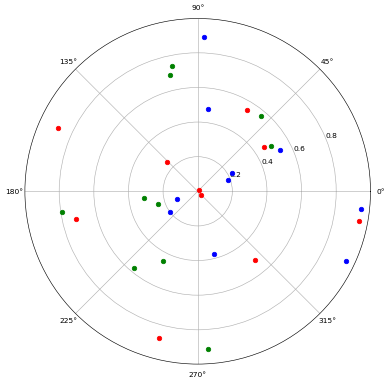

In [1]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk  
import numpy as np

class Application(tk.Frame):
    def __init__(self, master=None):
        tk.Frame.__init__(self,master)
        self.createWidgets()

    def createWidgets(self):
        fig=plt.figure(figsize=(8,8))
        ax=fig.add_axes([0.1,0.1,0.8,0.8],polar=True)
        canvas=FigureCanvasTkAgg(fig,master=root)
        canvas.get_tk_widget().grid(row=0,column=1)
        canvas.draw()

        self.plotbutton=tk.Button(master=root, text="plot", command=lambda: self.plot(canvas,ax))
        self.plotbutton.grid(row=0,column=0)

    def plot(self,canvas,ax):
        c = ['r','b','g']  # plot marker colors
        ax.clear()         # clear axes from previous plot
        for i in range(3):
            theta = np.random.uniform(0,360,10)
            r = np.random.uniform(0,1,10)
            ax.plot(theta,r,linestyle="None",marker='o', color=c[i])
            canvas.draw()

root=tk.Tk()
app=Application(master=root)
app.mainloop()

In [1]:
import tkinter as tk
from tkinter import*
from itertools import cycle

RADIUS = 5
DELAY = 100  # milliseconds
WIDTH, HEIGHT = 500, 500

coordinates = [(100, 50), (200, 200), (300, 250), (400, 300)]

stop = True
def move():
    global stop
    x, y = next(cycled_coordinates)
    canvas.coords(dot, x-RADIUS, y-RADIUS, x+RADIUS, y+RADIUS)
    canvas.after(DELAY, move)

cycled_coordinates = cycle(coordinates)

master = tk.Tk()

start_stop_button = Button(master, text="Start/Stop", command=move)
start_stop_button.pack(side="bottom")


canvas = tk.Canvas(master, width=WIDTH, height=HEIGHT)
canvas.pack()

x, y = next(cycled_coordinates)

dot = canvas.create_oval(x-RADIUS, y-RADIUS, x+RADIUS, y+RADIUS, fill='red')

#canvas.after(DELAY, move)

master.mainloop()

In [1]:
import matplotlib.pylab as plt
import numpy as np
import matplotlib.animation as animation
import pandas as pd
import time 
import collections
import serial
import threading

class arduino(object):#serial_port,baud_rate=baud_rate):
    
    def __init__(self,serial_port='/dev/cu.usbmodem14201',baud_rate=9600,vector_lenght=5000):
        
        self.serial_port   = serial_port
        self.baud_rate     = baud_rate
    
        self.vector_lenght = vector_lenght
        
        self.time = collections.deque([0]*vector_lenght, maxlen=vector_lenght)
        self.raw_data = collections.deque([np.NaN]*vector_lenght, maxlen=vector_lenght)

        self.arduinoData = serial.Serial(self.serial_port, self.baud_rate) 

        self.t_start = np.copy(time.time())

    def read_serial_monitor(self,arduinoData):
    
        arduinoString = arduinoData.readline()
        arduinoString = arduinoString.decode("utf-8")
        arduinoString = arduinoString.strip()

        self.char_list     = arduinoString.split('\t')  
        

        return float(arduinoString)
   
    def read(self):

        while True:
            t = time.time()-self.t_start
            x = self.read_serial_monitor(self.arduinoData)
            #print("{:>30}".format(x),end="")
            self.raw_data.append(x)
            self.time.append(t)

        


import tkinter as tk
from tkinter import*
from itertools import cycle

RADIUS = 5
DELAY = 10  # milliseconds
WIDTH, HEIGHT = 1000, 25

def scale(x):
    return -(x-30)/60*WIDTH

def mean_update(mean,x,n):
    mean = (mean*n+x)/(n+1)
    n = n+1
    return mean,n

start_time = time.time()

my_arduino = arduino(vector_lenght=2500)
#Loops the in_background function
try:
    thread = threading.Thread(target = my_arduino.read)
    thread.start() 

except KeyboardInterrupt:
    thread._Thread_stop() 
    #sys.exit()

def move():
    global my_arduino
    vector = my_arduino.raw_data
    x, y = scale(vector[-1]),10
    canvas.coords(dot, x-RADIUS, y-RADIUS, x+RADIUS, y+RADIUS)
    canvas.after(DELAY, move)
    #print(x)

n = my_arduino.vector_lenght
 
master = tk.Tk()

canvas = tk.Canvas(master, width=WIDTH, height=HEIGHT)
canvas.pack()

vector = my_arduino.raw_data
x, y = vector[-1],0

dot = canvas.create_oval(x-RADIUS, y-RADIUS, x+RADIUS, y+RADIUS, fill='red')

canvas.after(DELAY, move)

master.mainloop()

SerialException: [Errno 2] could not open port /dev/cu.usbmodem14201: [Errno 2] No such file or directory: '/dev/cu.usbmodem14201'

In [4]:
x

13.88